## Deep Learning with PyTorch : Neural Style Transfer

## Task 1 : Set Google Colab runtime

![](https://archive.org/download/deep-learning-with-py-torch/Deep%20Learning%20with%20PyTorch.png)

In [4]:
!pip install torch torchvision

ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

torchvision 0.10.1 requires torch==1.9.1, but you'll have torch 1.9.0 which is incompatible.
You should consider upgrading via the 'c:\users\user\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [1]:
!git clone https://github.com/parth1620/Project-NST.git

Cloning into 'Project-NST'...


## Task 2 : Loading VGG Pretrained Model

In [12]:
import torch
from torchvision.models import vgg19

vgg= vgg19(pretrained = True, progress=False)
print(vgg)

Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to C:\Users\USER/.cache\torch\hub\checkpoints\vgg19-dcbb9e9d.pth


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padd

In [7]:
vgg = vgg.features
print(vgg)

NameError: name 'vgg' is not defined

In [4]:
for parameters in vgg.parameters():
  parameters.requires_grad_(False)

In [5]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [6]:
vgg.to(device)

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (17): ReLU(inplace=True)
  (18): MaxPoo

## Task 3 : Preprocess image

Torchvision models page : https://pytorch.org/docs/stable/torchvision/models.html

In [3]:
from PIL import Image
import torch as torch
from torchvision import transforms as T

def preprocess(img_path, max_size =500):
  image = Image.open(img_path).convert('RGB')
  if max(image.size)> max_size:
    size= max_size
  else:
    size = max(image.size)

  img_transforms= T.Compose([
                             T.Resize(size),
                             T.ToTensor(),
                             T.Normalize(mean=[0.485, 0.456, 0.406],
                                         std=[0.229, 0.224, 0.225])
  ])
  image = img_transforms(image)
  image = image.unsqueeze(0)
  return image

ModuleNotFoundError: No module named 'torchvision'

In [2]:
content_p = preprocess('/content/Project-NST/content11.jpg')
style_p = preprocess('/content/Project-NST/style12.jpg')

content_p = content_p.to(device)
style_p = style_p.to(device)

print("Content Shape", content_p.shape)
print("Style Shape", style_p.shape)

NameError: name 'preprocess' is not defined

## Task 4 : Deprocess image

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def deprocess(tensor):
  image = tensor.to("cpu").clone()
  image = image.numpy()
  image = image.squeeze(0)
  image = image.transpose(1, 2, 0)
  image = image * np.array([0.229, 0.224, 0.225]) + np.array([0.485, 0.456, 0.406])
  image = image.clip(0,1)
  return image

In [10]:
content_d = deprocess(content_p)
style_d = deprocess(style_p)

print(content_d.shape)
print(style_d.shape)

(259, 345, 3)
(625, 500, 3)


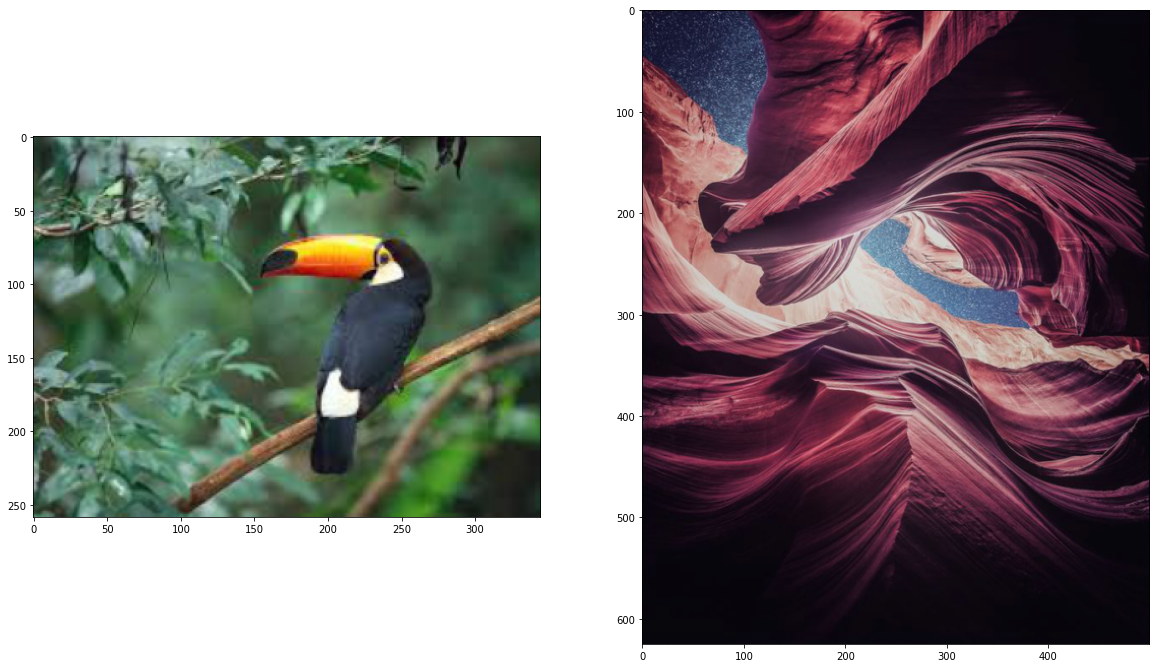

In [11]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize =(20,16))

ax1.imshow(content_d)
ax2.imshow(style_d)

## Task 5 : Get content,style features and create gram matrix

In [12]:
def get_features(image, model):
  layers = {
      '0' : 'conv1_1',
      '5' :'conv2_1',
      '10':'conv3_1',
      '19':'conv4_1',
      '21':'conv4_2',
      '28':'conv5_1'
  }
  x= image

  features = {}
  for name,layer in model._modules.items():
    x= layer(x)
    if name in layers:
      features[layers[name]]= x
  return features

In [13]:
content_f = get_features(content_p, vgg)
style_f = get_features(style_p, vgg)

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


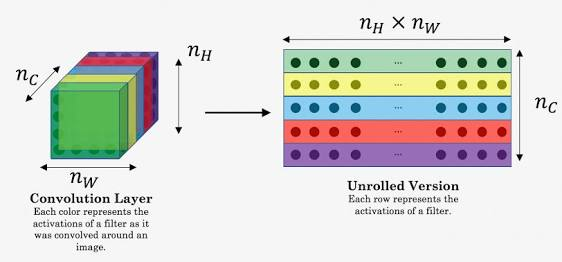

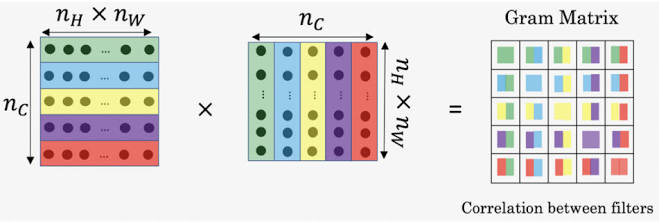

In [14]:
def gram_metrix(tensor):
  batch, channel, height, width = tensor.size()
  tensor = tensor.view(channel, height*width)
  gram = torch.mm(tensor, tensor.t())
  return gram

In [15]:
style_grams = { layer : gram_metrix(style_f[layer]) for layer in style_f}

## Task 6 : Creating Style and Content loss function

In [16]:
def content_loss(target_conv4_2, content_conv4_2):
  loss = torch.mean((target_conv4_2-content_conv4_2)**2)
  return loss

In [17]:
style_weights = {
    'conv1_1' : 1.0,
    'conv2_1' : 0.75,
    'conv3_1' : 0.2,
    'conv4_1' : 0.2,
    'conv5_1' : 0.2
}

In [18]:
def style_loss(style_weights, target_features, style_grams):
  loss = 0
  for layer in style_weights:
    target_f = target_features[layer]
    target_gram = gram_metrix(target_f)
    style_gram = style_grams[layer]
    batch, channel, height, width = target_f.shape
    layer_loss = style_weights[layer] * torch.mean((target_gram - style_gram) ** 2)
    loss += layer_loss/(channel*height*width)
  return loss

In [19]:
target = content_p.clone().requires_grad_(True).to(device)
target_f = get_features(target,vgg)
print('content loss ',content_loss(target_f['conv4_2'], content_f['conv4_2']))
print('style loss ',style_loss(style_weights, target_f, style_grams))


content loss  tensor(0., device='cuda:0', grad_fn=<MeanBackward0>)
style loss  tensor(1790.8409, device='cuda:0', grad_fn=<AddBackward0>)


## Task 7 : Training loop

In [20]:
from torch import optim
optimizer = optim.Adam([target], lr=0.003)
alpha = 1
beta = 1e5
epochs = 3000
show_every = 500

In [21]:
def total_loss(content_loss, style_loss, alpha, beta):
  loss = alpha * content_loss + beta * style_loss
  return loss

In [22]:
results = []
for i in range(epochs):
  target_f= get_features(target, vgg)
  c_loss = content_loss(target_f['conv4_2'], content_f['conv4_2'])
  s_loss = style_loss(style_weights, target_f, style_grams)
  t_loss = total_loss(c_loss, s_loss, alpha, beta)
  optimizer.zero_grad()
  t_loss.backward()
  optimizer.step()

  if i % show_every ==0:
    print("total loss at epoch {} : {} ".format(i, t_loss))
    results.append(deprocess(target.detach()))

total loss at epoch 0 : 179084096.0 
total loss at epoch 500 : 27107642.0 
total loss at epoch 1000 : 15145349.0 
total loss at epoch 1500 : 11682566.0 
total loss at epoch 2000 : 9622127.0 
total loss at epoch 2500 : 8202719.5 


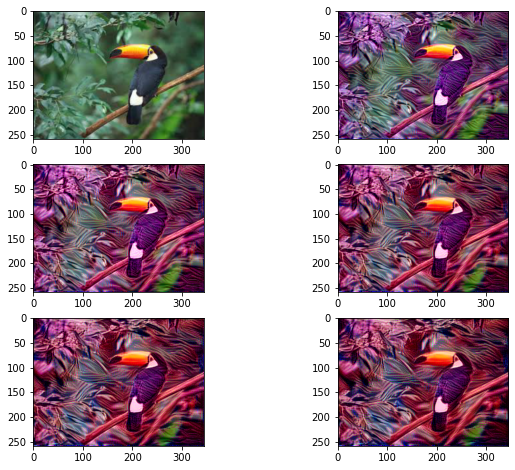

In [23]:
plt.figure(figsize=(10,8))
for i in range(len(results)):
  plt.subplot(3,2,i+1)
  plt.imshow(results[i])
plt.show()

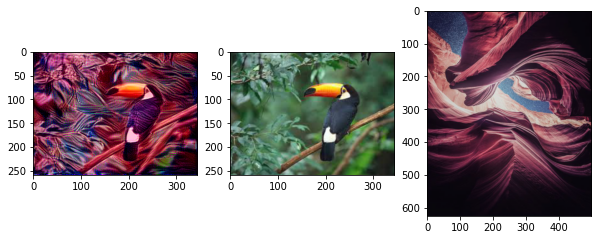

In [25]:
target_copy = deprocess(target.detach())
content_copy = deprocess(content_p)
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize =(10,5))
ax1.imshow(target_copy)
ax2.imshow(content_copy)
ax3.imshow(style_d)